**Objective:**

The objective is simple to classify and predict apple quality either it is good or bad. So using the Navie bayes classifier, it can be classified and predict. In order to measure performance of the model we will take help of accuracy score, classification report and confusion matrix.

**Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

**Data statistics**

In [ ]:
data = pd.read_csv(r"/content/apple_quality.csv")

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.drop('A_id', axis = 1, inplace = True)

In [ ]:
data.info() # so there is nul value here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [ ]:
data = data.dropna(axis = 0)#axis=0 means delete rows

In [ ]:
data.iloc[:, -1 :].value_counts() # counts of good and bad

Quality
good       2004
bad        1996
Name: count, dtype: int64

In [ ]:
def catagorical(item):
    if item == 'good':
        return 1.0
    else:
        return 0.0

In [ ]:
data['Quality'] = data['Quality'].apply(lambda x: catagorical(x))

In [ ]:
data['Quality'].value_counts()

Quality
0.0    4000
Name: count, dtype: int64

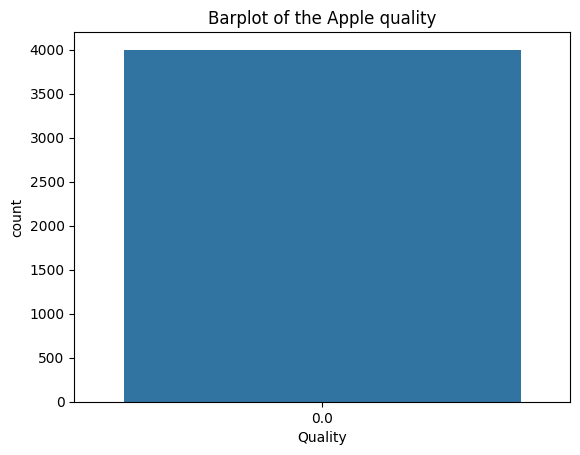

In [ ]:
sns.countplot(x = 'Quality', data = data)
plt.title('Barplot of the Apple quality')
plt.show()

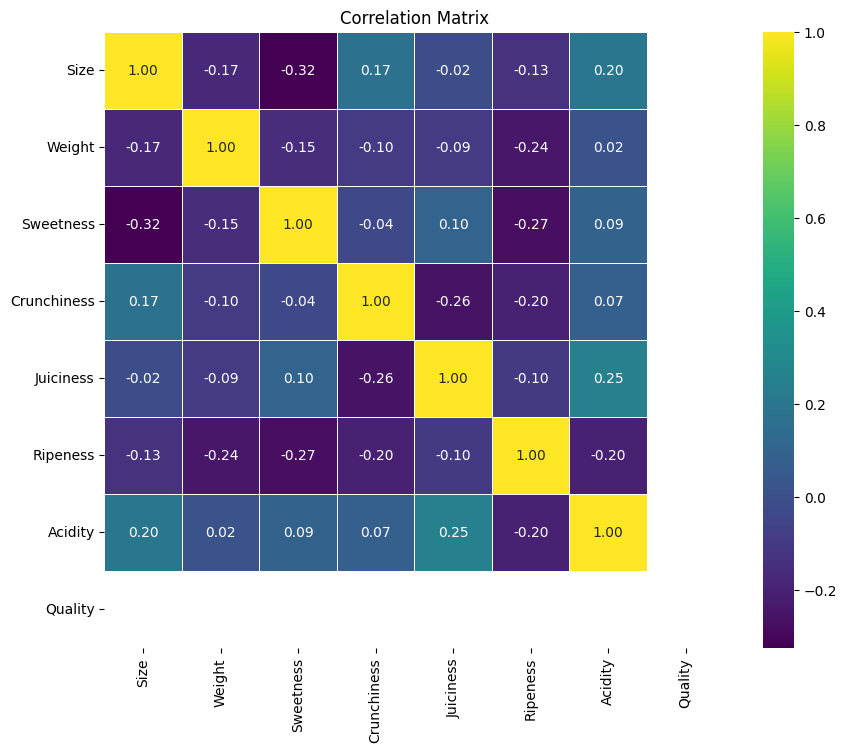

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

**Training datasets**

In [ ]:
X = data.iloc[:, : -1]
y = data.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Classification Report function
def class_report(yt, yp):
    return pd.DataFrame(classification_report(yt, yp, output_dict = True)).transpose()

In [ ]:
# Confusion Matrix function
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)

    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'viridis', fmt = '0.2f', annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Apple Quality Classification')
    plt.show()

**Naive Bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [23]:
from sklearn import metrics
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(metrics.accuracy_score(y_pred_dt,y_test))

1.0


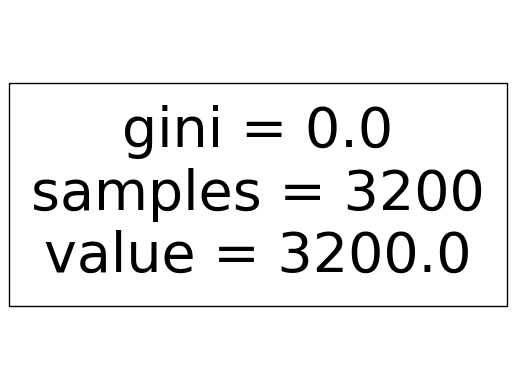

In [27]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure()
_ = tree.plot_tree(dt,
                   feature_names=data.columns,
                   class_names=['1','0'],
                   filled=True)

In conclusion, it is seen that KNN model is working average as per classification report and confusion matrix. So it is advised

either remove outlier and do features scaling
or use other model that might be good fit such as XGBOOST or SVM model.